# お前誰？
* じょんすみす
* どこにでもいる普通のアル中

# データ

![凛ちゃんデータセット](http://image.slidesharecdn.com/rinchan-150412041658-conversion-gate01/95/-20-638.jpg)
[凛ちゃんデータセット](http://www.slideshare.net/__john_smith__/rin-chan-46900896)

* SVM
 * accuracy : 0.68
* BoW+全結合
 * accuracy : 0.62

# 過去

![PCA](http://image.slidesharecdn.com/pronama-150514165035-lva1-app6891/95/5-22-638.jpg)
![learning curve](http://image.slidesharecdn.com/pronama-150514165035-lva1-app6891/95/5-24-638.jpg)

# 制約

日本においては非常によくある制約条件下の元でよくする  
目指すはSVM越えの0.69以上

* 開発きとしてはスペック不足であるMacbook(12inch)でやる
 * windows xp + celeronを用意できなかったのが悔やまれる
* データの方をもうちょっと整備したい
* 「Deep Learningでやってもらわなきゃ困る！」

# Why

日本人はもっと無駄なことをしてもいいと思うんだ

In [6]:
%matplotlib inline 

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM, Embedding
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.preprocessing import sequence

import csv

import matplotlib.pyplot as plt

In [21]:
input_length = 200
nb_epoch = 20
input_dim = 256

In [22]:
rin_chan = {'hoshizora':0, 'shibuya':1, 'toosaka':2, 'matsuoka':3}
x = []
y = []
for line in csv.reader(open('../data/data.tsv'), delimiter='\t'):
    x.append(list(line[1]))
    y.append(rin_chan[line[0]])
y = np_utils.to_categorical(y)

word_dict = {}
for i, xi in enumerate(x):
    for j, xj in enumerate(xi):
        word_dict[xj]= word_dict.get(xj, len(word_dict))
        x[i][j] = word_dict[xj]

x = sequence.pad_sequences(x, input_length)

x_train = x[0:6000]
y_train = y[0:6000]

x_test = x[6000:]
y_test = y[6000:]

In [23]:
model = Sequential()
model.add(Embedding(len(word_dict), input_dim,  input_length=input_length, dropout=0.2))
model.add(LSTM(input_dim, dropout_W=0.2, dropout_U=0.2, consume_less='cpu'))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, batch_size=200, nb_epoch=nb_epoch, validation_split=0.1, verbose=1)

Train on 5400 samples, validate on 600 samples
Epoch 1/20
5400/5400 [==============================] - 238s - loss: 1.3647 - acc: 0.3063 - val_loss: 1.3514 - val_acc: 0.2833
Epoch 2/20
5400/5400 [==============================] - 268s - loss: 1.2836 - acc: 0.4043 - val_loss: 1.1903 - val_acc: 0.4767
Epoch 3/20
5400/5400 [==============================] - 244s - loss: 1.1525 - acc: 0.4978 - val_loss: 1.2013 - val_acc: 0.5283
Epoch 4/20
5400/5400 [==============================] - 197s - loss: 1.0768 - acc: 0.5502 - val_loss: 1.0996 - val_acc: 0.5550
Epoch 5/20
5400/5400 [==============================] - 228s - loss: 0.9878 - acc: 0.5983 - val_loss: 0.9842 - val_acc: 0.5967
Epoch 6/20
5400/5400 [==============================] - 239s - loss: 0.9243 - acc: 0.6189 - val_loss: 1.0705 - val_acc: 0.5600
Epoch 7/20
5400/5400 [==============================] - 255s - loss: 0.8879 - acc: 0.6402 - val_loss: 0.9390 - val_acc: 0.6350
Epoch 8/20
5400/5400 [==============================] - 244s - l

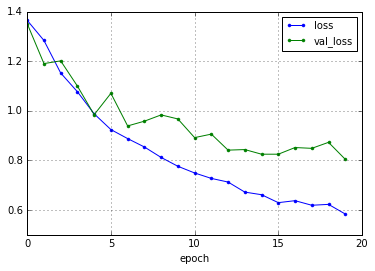

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(nb_epoch), loss, marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.show()

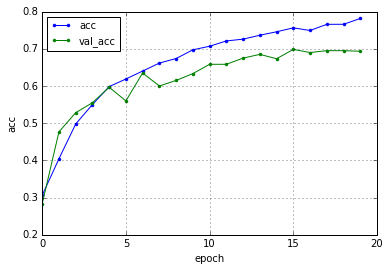

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(range(nb_epoch), acc, marker='.', label='acc')
plt.plot(range(nb_epoch), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [27]:
model.evaluate(x_test, y_test)

1581/1581 [==============================] - 9s     


[0.88847176882377688, 0.66097406719697571]

In [30]:
model.predict(x_test)

array([[ 0.00128611,  0.00213588,  0.00101355,  0.99556446],
       [ 0.00458012,  0.00411254,  0.98996818,  0.00133914],
       [ 0.14810757,  0.26922336,  0.04990125,  0.53276777],
       ..., 
       [ 0.01748418,  0.95144844,  0.02092962,  0.01013778],
       [ 0.54031181,  0.19255109,  0.24230763,  0.02482947],
       [ 0.97320104,  0.00393087,  0.00167357,  0.02119455]], dtype=float32)